## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import plotly.express as px
import random

## Import data

In [2]:
input= '/content/drive/MyDrive/traffic_Data'
training = '/content/drive/MyDrive/traffic_Data/DATA'
testing= '/content/drive/MyDrive/traffic_Data/TEST'
classes = pd.read_csv(os.path.join(input,'labels.csv'))
classes_size = len(classes)
print("Total number of classes: ", classes_size)

Total number of classes:  58


In [3]:
traffic_data = []
training_data = []
labels = []
def fetch_images(traffic_data,labels):
    for classValue in os.listdir(os.path.join(input, training)):
        classPath = os.path.join(input,training,classValue)
        labels.append(classValue)
        for trafficSignal in os.listdir(classPath):
            imgTrafficSignal = Image.open(os.path.join(classPath,trafficSignal))

            imgTrafficSignal = imgTrafficSignal.convert("L")
            imgTrafficSignal = imgTrafficSignal.resize((90,90))
            imgTrafficSignal = np.array(imgTrafficSignal)
            traffic_data.append((imgTrafficSignal,[int(classValue)]))
    labels = np.array(labels)
    return traffic_data, labels

In [4]:
traffic_data,labels = fetch_images(traffic_data,labels)
traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features,validation_data_features,training_data_labels,validation_data_labels = train_test_split(traffic_data_features,
                                                                                                               traffic_data_labels,
                                                                                                               test_size=0.33,
                                                                                                               random_state=42)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)
print(training_data_features.shape)
print(training_data_labels.shape)

(737, 90, 90)
(737, 1)


# Visualizing some of the training data

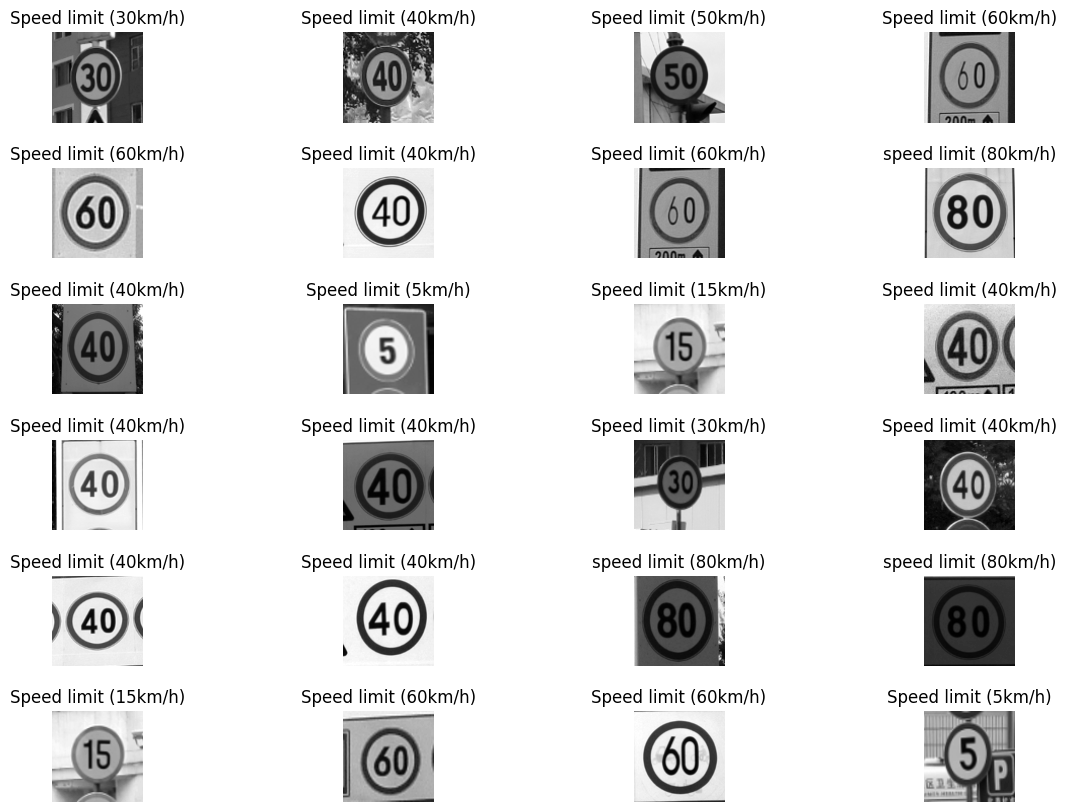

In [5]:
def imageDisplayer(data_features, data_labels_act, data_labels_pred=None):
  rows, cols = 6, 4
  fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

  plt.subplots_adjust(wspace=0, hspace=0.5)
  if data_labels_pred is not None:
    for row in range(rows):
      for col in range(cols):
        i = row * cols + col  # Calculate the index
        randomVal = random.randint(1,2)
        # Get the image and label for the current index
        display_image = data_features[i*randomVal]
        display_label_act = classes['Name'][data_labels_act[i*randomVal][0]]

        display_label_pred = classes['Name'][data_labels_pred[i*randomVal]]

        # Display the image
        axes[row, col].imshow(display_image, cmap='gray')
        axes[row, col].set_title((display_label_act, display_label_pred))
        axes[row, col].axis('off')

  else:
    for row in range(rows):
      for col in range(cols):
        i = row * cols + col  # Calculate the index
        randomVal = random.randint(1,2)
        # Get the image and label for the current index
        display_image = data_features[i*randomVal]
        display_label = classes['Name'][data_labels_act[i*randomVal][0]]

        # Display the image
        axes[row, col].imshow(display_image, cmap='gray')
        axes[row, col].set_title(display_label)
        axes[row, col].axis('off')
imageDisplayer(training_data_features, training_data_labels)

## Design a model

In [6]:
cnnModel = Sequential()
cnnModel.add(Conv2D(16,(3,3), padding="same", input_shape=(90, 90, 1), activation='relu'))
print(cnnModel(training_data_features).shape)
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Conv2D(32,(3,3), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Conv2D(64,(5,5), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Conv2D(128,(7,7), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Flatten())
cnnModel.add(Dense(232, activation='relu'))
cnnModel.add(Dense(116, activation='relu'))
cnnModel.add(Dense(58, activation='softmax'))


(737, 90, 90, 16)


In [10]:
epochs = 10
batchSize = 14
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [11]:
print(training_data_features.shape, training_data_labels.shape)
print(training_data_labels)

(737, 90, 90) (737, 1)
[[ 2]
 [ 3]
 [ 6]
 [ 4]
 [ 4]
 [ 3]
 [ 5]
 [ 3]
 [ 5]
 [ 7]
 [ 2]
 [ 3]
 [ 5]
 [ 3]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 0]
 [ 3]
 [ 1]
 [ 4]
 [10]
 [10]
 [ 3]
 [ 7]
 [ 3]
 [ 0]
 [ 2]
 [ 7]
 [ 3]
 [ 0]
 [ 3]
 [ 4]
 [ 3]
 [ 7]
 [ 7]
 [ 5]
 [ 7]
 [ 3]
 [ 3]
 [ 3]
 [ 5]
 [ 0]
 [ 5]
 [ 3]
 [ 0]
 [ 1]
 [ 5]
 [ 5]
 [ 4]
 [ 0]
 [ 7]
 [ 4]
 [ 5]
 [ 8]
 [ 5]
 [ 0]
 [ 2]
 [10]
 [ 4]
 [10]
 [ 3]
 [ 0]
 [ 3]
 [ 3]
 [ 7]
 [ 5]
 [ 5]
 [ 1]
 [ 6]
 [ 6]
 [10]
 [ 7]
 [10]
 [ 0]
 [10]
 [ 7]
 [ 1]
 [ 0]
 [ 8]
 [ 6]
 [ 5]
 [ 5]
 [ 4]
 [ 3]
 [ 7]
 [ 5]
 [ 3]
 [ 5]
 [ 2]
 [ 4]
 [ 3]
 [ 7]
 [ 6]
 [ 1]
 [10]
 [ 2]
 [ 7]
 [ 4]
 [ 6]
 [ 5]
 [ 7]
 [ 3]
 [ 3]
 [ 7]
 [ 6]
 [ 5]
 [ 5]
 [ 0]
 [ 5]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 5]
 [ 7]
 [ 5]
 [10]
 [ 6]
 [ 5]
 [ 0]
 [ 4]
 [ 4]
 [ 7]
 [ 4]
 [ 7]
 [ 0]
 [ 5]
 [ 0]
 [ 4]
 [ 0]
 [ 3]
 [ 3]
 [ 5]
 [ 3]
 [ 0]
 [ 3]
 [ 2]
 [ 3]
 [ 4]
 [ 3]
 [ 0]
 [ 3]
 [ 4]
 [ 7]
 [ 7]
 [ 5]
 [ 5]
 [ 7]
 [ 3]
 [ 5]
 [ 4]
 [ 2]
 [ 7]
 [ 3]
 [ 5]
 [ 4]
 [ 7]
 [ 4]
 [ 7]
 [ 6]

## Compiling a Model

In [12]:
cnnModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Training

In [13]:
trafficSignNetwork = cnnModel.fit(training_data_features,
                                  training_data_labels,
                                  batch_size=batchSize,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


53/53 [==============================] - 22s 374ms/step - loss: 5.4356 - accuracy: 0.3175 - val_loss: 1.3676 - val_accuracy: 0.5785
Epoch 2/10
53/53 [==============================] - 22s 418ms/step - loss: 0.7661 - accuracy: 0.7612 - val_loss: 0.3922 - val_accuracy: 0.8815
Epoch 3/10
53/53 [==============================] - 18s 340ms/step - loss: 0.2934 - accuracy: 0.9037 - val_loss: 0.2866 - val_accuracy: 0.9118
Epoch 4/10
53/53 [==============================] - 18s 337ms/step - loss: 0.2542 - accuracy: 0.9281 - val_loss: 0.3045 - val_accuracy: 0.9091
Epoch 5/10
53/53 [==============================] - 19s 350ms/step - loss: 0.0957 - accuracy: 0.9742 - val_loss: 0.1500 - val_accuracy: 0.9587
Epoch 6/10
53/53 [==============================] - 17s 326ms/step - loss: 0.0475 - accuracy: 0.9878 - val_loss: 0.2909 - val_accuracy: 0.9284
Epoch 7/10
53/53 [==============================] - 26s 497ms/step - loss: 0.1302 - accuracy: 0.9620 - val_loss: 0.1569 - val_accuracy: 0.9587
Epoch 8/10

## Testing

In [15]:
testing_data = []
for test_image_file in os.listdir(os.path.join(input, testing)):
    testImage = Image.open(os.path.join(input, testing, test_image_file))
    testImage = testImage.convert("L")
    testImage = testImage.resize((90,90))
    testImage = np.array(testImage)
    testing_data.append((testImage, [int(test_image_file[1:3])]))
testing_data_features, testing_data_labels = zip(*testing_data)
testing_data_features = np.array(testing_data_features)
testing_data_labels = np.array(testing_data_labels)

# Evaluate the test data

In [16]:
predictions = cnnModel.predict(testing_data_features)
predicted_labels = np.argmax(predictions, axis=1)

14/14 [==============================] - 3s 232ms/step


# Visualize Result Data and Actual Data

2     Speed limit (30km/h)
0      Speed limit (5km/h)
0      Speed limit (5km/h)
0      Speed limit (5km/h)
0      Speed limit (5km/h)
              ...         
10        Dont Go straight
10        Dont Go straight
10        Dont Go straight
0      Speed limit (5km/h)
7     speed limit (80km/h)
Name: Name, Length: 422, dtype: object
0     Speed limit (5km/h)
0     Speed limit (5km/h)
0     Speed limit (5km/h)
0     Speed limit (5km/h)
0     Speed limit (5km/h)
             ...         
10       Dont Go straight
10       Dont Go straight
10       Dont Go straight
10       Dont Go straight
10       Dont Go straight
Name: Name, Length: 422, dtype: object


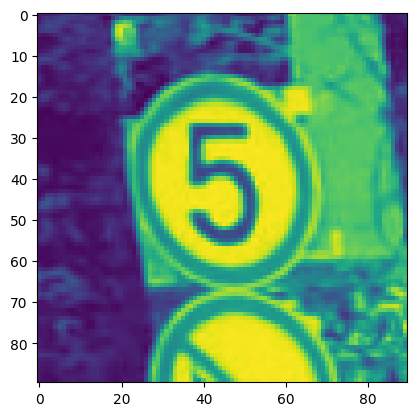

In [17]:
print(classes['Name'][predicted_labels])
print(classes['Name'][testing_data_labels[:,0]])
plt.imshow(testing_data_features[1])

# (Actual Label, Predicted Label)

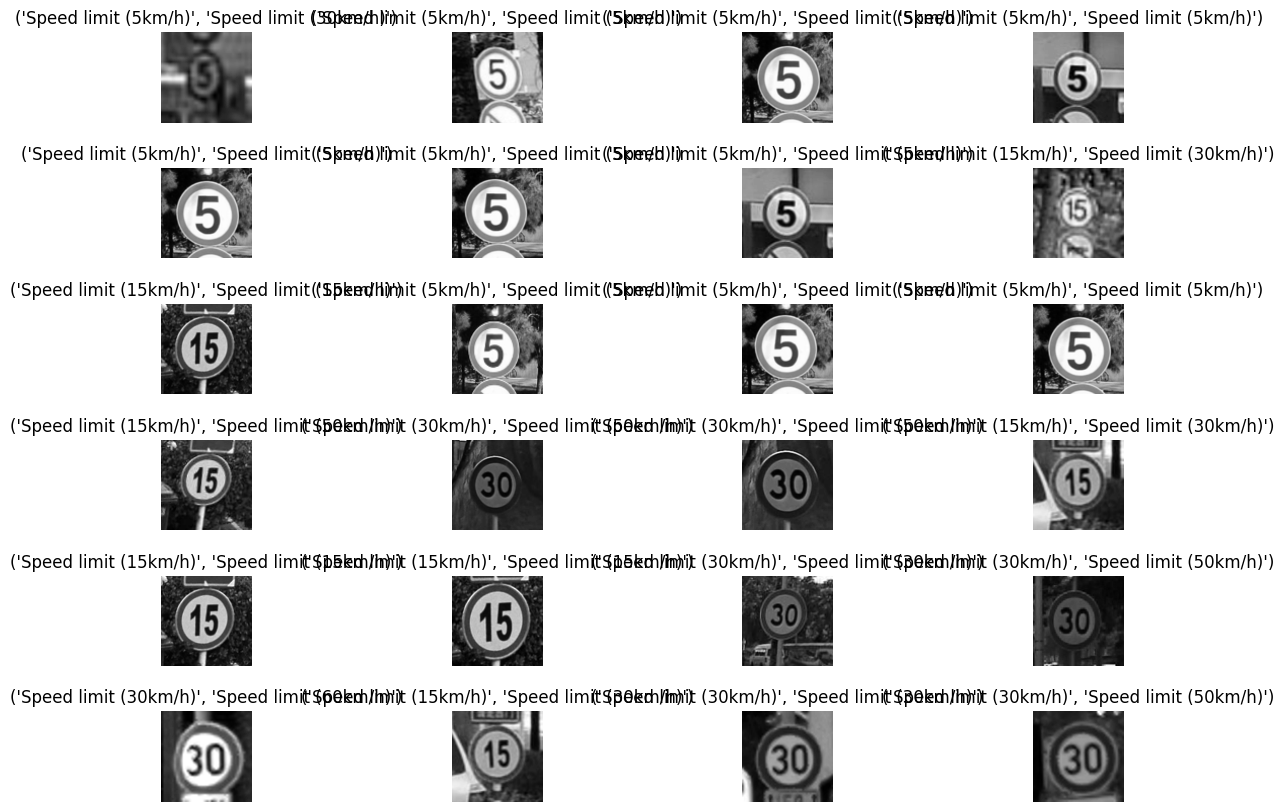

In [18]:
imageDisplayer(testing_data_features,testing_data_labels,predicted_labels)

In [19]:
test_loss, test_acc = cnnModel.evaluate(testing_data_features, testing_data_labels, verbose=2)
print(test_acc)

14/14 - 4s - loss: 3.4830 - accuracy: 0.5735 - 4s/epoch - 286ms/step
0.5734597444534302
